# Replicating Gniadecka et al.'s paper

In [1]:
from ipynb.fs.full.Import_data import import_data
from ipynb.fs.full.CNN2D       import CNN2D, train_model, test_model, analyse_results
from ipynb.fs.full.PCA         import my_pca
from ipynb.fs.full.subimages   import subimages

In [7]:
PCA_COMPONENTS = 20
N_BCC_LIM      = 10
LEARNING_RATE  = 0.01
EPOCHS         = 5000
SUBIMG_SPACING = 5
IMG_WIDTH      = 10
DROPOUT_RATE   = 0.1
TRAIN_CUTOFF   = 3750

## Data pre-processing

In [3]:
tissue = import_data()

In [4]:
## PCA transformation
new_tissue = my_pca(tissue, PCA_COMPONENTS)

In [8]:
### Get sub-images of size 40x40 ###
sub_images, target = subimages(new_tissue, IMG_WIDTH, SUBIMG_SPACING, PCA_COMPONENTS, N_BCC_LIM)

## CNN implementation

100%|██████████| 5000/5000 [08:21<00:00,  9.97it/s]


Training error = 10.75%
Test error = 12.740000000000002%


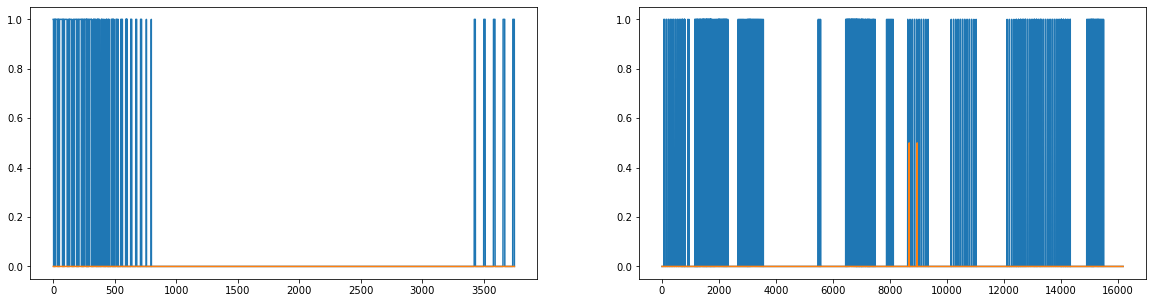

In [9]:
### Create 2D-CNN model ###
model = CNN2D(IMG_WIDTH,PCA_COMPONENTS,DROPOUT_RATE)

### Train model ###
# Input of CNN needts to be (NumberSamples,Channels,Height,Width) 
train_model(model, sub_images[:TRAIN_CUTOFF], target[:TRAIN_CUTOFF], LEARNING_RATE, EPOCHS, IMG_WIDTH, PCA_COMPONENTS)

### Test model ###
approximation_train = test_model(model, sub_images[:TRAIN_CUTOFF], IMG_WIDTH, PCA_COMPONENTS)
approximation_test  = test_model(model, sub_images[TRAIN_CUTOFF:], IMG_WIDTH, PCA_COMPONENTS)

error = analyse_results(approximation_train, approximation_test, target, TRAIN_CUTOFF, plot=1)

## Find optimal parameters

In [ ]:
min_error = 100

for size in [10,20,30,40]:
    for spacing in [5,10,20]:
        IMG_WIDTH = size
        SUBIMG_SPACING = spacing
        
        sub_images, target = subimages(new_tissue, IMG_WIDTH, SUBIMG_SPACING, PCA_COMPONENTS)
        
        model = CNN2D(IMG_WIDTH,PCA_COMPONENTS, DROPOUT_RATE)
        ### Train model ###
        train_model(model, sub_images[:TRAIN_CUTOFF], target[:TRAIN_CUTOFF], LEARNING_RATE, EPOCHS, IMG_WIDTH, PCA_COMPONENTS)

        ### Test model ###
        approximation_train = test_model(model, sub_images[:TRAIN_CUTOFF], IMG_WIDTH, PCA_COMPONENTS)
        approximation_test  = test_model(model, sub_images[TRAIN_CUTOFF:], IMG_WIDTH, PCA_COMPONENTS)
        
        error = analyse_results(approximation_train,approximation_test,target,TRAIN_CUTOFF,plot=1)
        
        print(error, size, spacing)
        if error < min_error:
            min_error = error
            min_params = [size, spacing]
            
min_params